# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

Craft your problem statement here using the prompt from the README and other sources you find during your investigation.

The dataset is about traffic accidents and driving license in Saudi Arabia, which were published by from General Authority for Statistics. This project aims to discover the patterns and trends of the number of accidents and licenses for each administrative regions in Saudi Arabia.

## Executive Summary
Write an executive summary that summarizes the problem and your key findings.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [980]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [981]:
#traffic_accidents[traffic_accidents['Region']=='Total']
#Code
traffic_accidents4=pd.read_csv('./../data/saudi-arabia-traffic-accidents-2008.csv', sep=';')
driving_licenses=pd.read_csv('./../data/saudi-arabia-driving-licenses-2004-2008.csv',sep=';')

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [982]:
traffic_accidents4.head(10)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [983]:
driving_licenses.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


In [984]:
# Data Cleaning
traffic_accidents4['Value'] = traffic_accidents4['Value'].str.strip('n')
traffic_accidents4['Year']=traffic_accidents4['Year'].str.strip('()')
traffic_accidents4.drop('Unnamed: 0', axis=1, inplace=True)
traffic_accidents4.drop('Unnamed: 0.1', axis=1, inplace=True)
traffic_accidents4.shape

(84, 5)

In [985]:
# Data Cleaning
driving_licenses['Driving Liceses'] = driving_licenses['Driving Liceses'].str.strip('n')
driving_licenses['Year']=driving_licenses['Year'].str.strip('()')
driving_licenses.drop('Unnamed: 0', axis=1, inplace=True)
driving_licenses.shape

(350, 4)

#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

**The traffic accidents and casualties data contains 5 columns and 84 rows, which covers the number of accidents
and casualties in Saudi Arabia during two years period 2016 and 2017.**

In [987]:
traffic_accidents4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
Year            84 non-null object
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null object
geo_point_2d    78 non-null object
dtypes: object(5)
memory usage: 3.4+ KB


**The Driving Licenses data contains 4 columns and 350 rows, which covers the number of Driving Licenses issued in Saudi Arabia during the period 1993 - 2017, distributed among 13 administrative Area.**

In [988]:
driving_licenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 4 columns):
Year                   350 non-null object
Administritive Area    350 non-null object
Driving Liceses        350 non-null object
geo_point_2d           325 non-null object
dtypes: object(4)
memory usage: 11.0+ KB


#### 4a. How complete is the data?

Investigate missing values etc.

In [989]:
traffic_accidents4.isnull().sum()

Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

In [990]:
driving_licenses.isnull().sum()

Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64

**To identify the missing values of traffic accidents and casualties data**

In [991]:
traffic_accidents4[traffic_accidents4.isnull().any(axis=1)]#['geo_point_2d']

,Year,Region,Indicator,Value,geo_point_2d
8,2017,Total,No. of Casualties - Dead,7489,NaN
29,2016,Total,No. of Accidents,533380,NaN
30,2016,Total,No. of Casualties - Injured,38120,NaN
68,2017,Total,No. of Accidents,460488,NaN
69,2017,Total,No. of Casualties - Injured,33199,NaN
77,2016,Total,No. of Casualties - Dead,9031,NaN


**To identify the missing values of driving licenses  data**

In [992]:
driving_licenses[driving_licenses.isnull().any(axis=1)]

,Year,Administritive Area,Driving Liceses,geo_point_2d
58,2015,Total,435439,NaN
59,2017,Total,928165,NaN
60,1993,Total,294893,NaN
61,1994,Total,303520,NaN
62,2003,Total,254858,NaN
63,2006,Total,267508,NaN
142,2014,Total,625414,NaN
143,2010,Total,386510,NaN
144,2012,Total,411204,NaN
145,1999,Total,332210,NaN


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

**Minimum  and maximum possible value**

In [993]:
# traffic_accidents
print(traffic_accidents4.max())
print('\n')
print(traffic_accidents4.min())

Year                                2017
Region                             Total
Indicator    No. of Casualties - Injured
Value                              99925
dtype: object


Year                     2016
Region               Al-Baaha
Indicator    No. of Accidents
Value                    1007
dtype: object


In [994]:
print(driving_licenses.max())
print('\n')
print(driving_licenses.min())

Year                    2017
Administritive Area    Total
Driving Liceses         9983
dtype: object


Year                      1993
Administritive Area    Al-Baha
Driving Liceses         100291
dtype: object


#### 5. What are your data types? 
Display the data types of each feature. 

In [995]:
#code
traffic_accidents4.dtypes

Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object

In [996]:
driving_licenses.dtypes

Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

**traffic_accidents4**

-Year should be integer

-Value should be integer

-geo_point_2d should be float

**driving_licenses**

-Year should be integer

-driving Liceses should be integer

-geo_point_2d should be float

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [997]:
#code
def convert(t):
    try :
        return int(t)
    except:
        return np.null
        

In [998]:
traffic_accidents4['Year']= traffic_accidents4['Year'].map(convert)
traffic_accidents4.dtypes

Year             int64
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object

In [999]:
driving_licenses['Year']= driving_licenses['Year'].map(convert)
driving_licenses.dtypes

Year                    int64
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object

- Make new columns `x` and `y` using `geo_point_2d`

In [1000]:
#code 
traffic_accidents4[['x','y']] = traffic_accidents4.geo_point_2d.str.split(',', expand=True)
traffic_accidents4.drop('geo_point_2d', axis=1, inplace=True)
traffic_accidents4.head()

,Year,Region,Indicator,Value,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628962766,41.2636898334
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.2883307307,50.1478302439
2,2016,Tabouk,No. of Casualties - Dead,434,27.90165499,37.2598581394
3,2016,Hail,No. of Casualties - Dead,299,27.400845724,41.4406960508
4,2016,Hail,No. of Accidents,10199,27.400845724,41.4406960508


In [1001]:
driving_licenses[['x','y']] = driving_licenses.geo_point_2d.str.split(',', expand=True)
driving_licenses.drop('geo_point_2d', axis=1, inplace=True)
driving_licenses.head()

,Year,Administritive Area,Driving Liceses,x,y
0,2012,Makkah,143954,21.628962766,41.2636898334
1,1994,Makkah,75349,21.628962766,41.2636898334
2,1998,Makkah,86082,21.628962766,41.2636898334
3,2004,Makkah,86636,21.628962766,41.2636898334
4,2005,Makkah,65099,21.628962766,41.2636898334


- Fix any individual values preventing other columns from being the appropriate type.

In [1002]:
#code
traffic_accidents4['x']=pd.to_numeric(traffic_accidents4.x)
traffic_accidents4['y']=pd.to_numeric(traffic_accidents4.y)

In [1003]:
#driving_licenses['x']=pd.to_numeric(driving_licenses.x)
driving_licenses['y']=pd.to_numeric(driving_licenses.y)

In [1004]:
# rename some values in region column to be consistent with administrative area columns of driving license data
traffic_accidents4["Region"] = traffic_accidents4["Region"].str.replace("Qassim","Al-Qaseem")
traffic_accidents4["Region"] = traffic_accidents4["Region"].str.replace("Eastern Region","Eastern")
traffic_accidents4["Region"] = traffic_accidents4["Region"].str.replace("Asir","Assir")
traffic_accidents4["Region"] = traffic_accidents4["Region"].str.replace("Al-Baaha","Al-Baha")

- Finish your data modifications by making sure the columns are now typed appropriately.

In [1005]:
#code
traffic_accidents4['Year']= traffic_accidents4['Year'].astype(int)
traffic_accidents4['Value']= traffic_accidents4['Value'].astype(int)

In [1006]:
#Code:
driving_licenses['Year']= driving_licenses['Year'].astype(int)
driving_licenses['Driving Liceses']= driving_licenses['Driving Liceses'].astype(int)

- Display the data types again to confirm they are correct.

In [1007]:
traffic_accidents4.dtypes

Year           int64
Region        object
Indicator     object
Value          int64
x            float64
y            float64
dtype: object

In [1008]:
driving_licenses.dtypes

Year                     int64
Administritive Area     object
Driving Liceses          int64
x                       object
y                      float64
dtype: object

#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [1009]:
#Rename the columns
traffic_accidents4.rename(
    columns={
        'Year': 'year',
        'Region': 'region',
        'Indicator':'casualties_types',
        'Value':'no_accidents',
        'x':'x_area',
        'y':'y_area'
    },
    inplace=True
)

In [1010]:
traffic_accidents4.head()

,year,region,casualties_types,no_accidents,x_area,y_area
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696


In [1015]:
driving_licenses.rename(
    columns={
        'Year': 'year',
        'Administritive Area': 'region',
        'Driving Liceses':'driving_licenses',
        'Value':'no_accidents',
        'x':'x_area',
        'y':'y_area'
    },
    inplace=True
)

In [1011]:
driving_licenses.head()

,Year,Administritive Area,Driving Liceses,x,y
0,2012,Makkah,143954,21.628962766,41.26369
1,1994,Makkah,75349,21.628962766,41.26369
2,1998,Makkah,86082,21.628962766,41.26369
3,2004,Makkah,86636,21.628962766,41.26369
4,2005,Makkah,65099,21.628962766,41.26369


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

### Traffic Accidents and Casualties 
|Feature|Type|Dataset|Description|
|---|---|---|---|
**year**| int| Traffic_Accidents|         The dataset cover 2 years period from 2016 to 2017
**region**| object| Traffic_Accidents|    The adinstrative region of saudi arabia which is totaled 13
**casualties_types**| object| Traffic_Accidents|  There are 4 categories(No. of Accidents, No. of Casualties - Dead, No. of Casualties - Injured)
**no_accidents**| object| Traffic_Accidents| The total number of accidents
**x_area**| float| Traffic_Accidents| Geographic location (longitude)
**y_area**| float| Traffic_Accidents| Geographic location (Latitude)

### Driving Licenses
|Feature|Type|Dataset|Description|
|---|---|---|---|
**year**| int| Driving Licenses|         The dataset cover 2 years period from 1993 to 2017
**Administritive Area**| object| Driving Licenses|    The administrative region of saudi arabia which is totaled 13
**Driving Liceses**| int| Driving Licenses|  Totoal Number of driving licenses that were issued
**x_area**| float| Driving Licenses| Geographic location (longitude)
**y_area**| float| Driving Licenses| Geographic location (Latitude)

#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

- Total is not associated with regions

### Confirm the numbers of all regions add up to total.

In [581]:
traffic_accidents4[traffic_accidents4['region'] == 'Total'].groupby(by=['year','casualties_types']).sum()

no_accidents  x_area  y_area
year casualties_types                                         
2016 No. of Accidents                   533380     0.0     0.0
     No. of Casualties - Dead             9031     0.0     0.0
     No. of Casualties - Injured         38120     0.0     0.0
2017 No. of Accidents                   460488     0.0     0.0
     No. of Casualties - Dead             7489     0.0     0.0
     No. of Casualties - Injured         33199     0.0     0.0

In [582]:
traffic_accidents4[traffic_accidents4['region'] != 'Total'].groupby(by=['year','casualties_types']).sum()

no_accidents      x_area      y_area
year casualties_types                                                 
2016 No. of Accidents                   533380  309.535811  309.535811
     No. of Casualties - Dead             9031  309.535811  309.535811
     No. of Casualties - Injured         38120  309.535811  309.535811
2017 No. of Accidents                   460488  309.535811  309.535811
     No. of Casualties - Dead             7489  309.535811  309.535811
     No. of Casualties - Injured         33199  309.535811  309.535811

In [1016]:
driving_licenses[driving_licenses['region'] == 'Total'].groupby(by='year').sum().tail(2)

,driving_licenses,y_area
year,,
2016,697017,0.0
2017,928165,0.0


In [1018]:
driving_licenses[driving_licenses['region'] != 'Total'].groupby(by='year').sum().sort_values('year').tail(2)

,driving_licenses,y_area
year,,
2016,697017,553.836254
2017,928165,553.836254


#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

**License data is in a long fromat because every row represents an observation belonging to a particular category while the data format of accident data is Wide because the data has a column for each variable.
long format is much more preferable as you will have much less metadata overhead (information about column names, dtypes, etc.).**

#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [609]:
piv_accidents=pd.pivot_table(traffic_accidents4,values='no_accidents', index=['year','region'], columns='casualties_types')

In [1021]:
piv_accidents.head()

casualties_types  No. of Accidents  No. of Casualties - Dead  \
year region                                                    
2016 Al-Baha                  3618                       185   
     Al-Jouf                 10212                       245   
     Al-Qaseem               25664                       397   
     Assir                   32684                       983   
     Eastern                101619                      1113   

casualties_types  No. of Casualties - Injured  
year region                                    
2016 Al-Baha                             1227  
     Al-Jouf                              920  
     Al-Qaseem                           1513  
     Assir                               2541  
     Eastern                             4893

#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [612]:
#code 
combined_datasets=pd.merge(piv_accidents, driving_licenses, on = ['region', 'year'], how='inner')
# to preserve the most data
pd.merge(piv_accidents, driving_licenses, on = ['region', 'year'], how='outer')
# there are alot of nan because outer included all the values between the dataset while inner include 
#only the intersection values

In [614]:
combined_datasets= combined_datasets[combined_datasets.region != 'Total']

In [1024]:
combined_datasets

,region,year,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured,driving_licenses,x_area,y_area
0,Al-Baha,2016,3618,185,1227,4614,20.148406,20.148406
1,Al-Jouf,2016,10212,245,920,9371,29.967745,29.967745
2,Al-Qaseem,2016,25664,397,1513,9180,26.196706,26.196706
3,Assir,2016,32684,983,2541,41367,19.138785,19.138785
4,Eastern,2016,101619,1113,4893,142307,23.288331,23.288331
5,Hail,2016,10199,299,932,54507,27.400846,27.400846
6,Jazan,2016,25873,514,2259,11504,17.207231,17.207231
7,Madinah,2016,14475,822,4184,24540,24.927535,24.927535
8,Makkah,2016,134838,2243,12383,136055,21.628963,21.628963
9,Najran,2016,3235,173,706,2153,18.451100,18.451100


#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [897]:
#
combined_datasets.to_csv('/Users/someone/Desktop/GA-Course \project1.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [617]:
#Code:
combined_datasets.describe().T

,count,mean,std,min,25%,50%,75%,max
year,26.0,2016.500000,0.509902,2016.000000,2016.000000,2016.500000,2017.000000,2017.000000
No. of Accidents,26.0,38225.692308,46493.705035,1414.000000,10276.250000,16050.500000,30981.250000,145541.000000
No. of Casualties - Dead,26.0,635.384615,549.783381,112.000000,241.250000,415.500000,929.250000,2243.000000
No. of Casualties - Injured,26.0,2743.038462,2922.641127,374.000000,923.000000,1618.500000,3784.000000,12383.000000
driving_licenses,26.0,62507.000000,107293.917762,2153.000000,8363.250000,16085.000000,51222.000000,495307.000000
x_area,26.0,23.810447,4.274533,17.207231,20.148406,23.288331,27.400846,30.197075
y_area,26.0,23.810447,4.274533,17.207231,20.148406,23.288331,27.400846,30.197075


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [625]:
#code
def std_dev(series):
    return np.sqrt(sum((series-series.mean())**2)/(len(series)-1))
std_dev(combined_datasets['No. of Accidents'])



46493.70503521458

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [1026]:
#Code:
sd={e:std_dev(traffic_accidents4[e]) for e in list(traffic_accidents4.columns[[0,3,4,5]])}
#list(combined_datasets.std() for col in combined_datasets.columns)

In [1027]:
sd

{'year': 0.5030030300035687,
 'no_accidents': 80358.97913433761,
 'x_area': nan,
 'y_area': nan}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- highest Driving Licenses (Northern Boarder, Al-Baha, Tabouk, Najran)

In [1211]:
driving_licenses_grouped_max=pd.pivot_table(driving_licenses,index=['region'],values=['driving_licenses'],columns='year')
driving_licenses_grouped_min=pd.pivot_table(driving_licenses,index=['region'],values=['driving_licenses'],columns='year')
print(driving_licenses_grouped.idxmin(),
driving_licenses_grouped.idxmax())

                  year
driving_licenses  1993    Northern Boarder
                  1994    Northern Boarder
                  1995    Northern Boarder
                  1996    Northern Boarder
                  1997    Northern Boarder
                  1998    Northern Boarder
                  1999    Northern Boarder
                  2000    Northern Boarder
                  2001    Northern Boarder
                  2002    Northern Boarder
                  2003    Northern Boarder
                  2004    Northern Boarder
                  2005    Northern Boarder
                  2006    Northern Boarder
                  2007             Al-Baha
                  2008    Northern Boarder
                  2009    Northern Boarder
                  2010    Northern Boarder
                  2011    Northern Boarder
                  2012    Northern Boarder
                  2013    Northern Boarder
                  2014    Northern Boarder
                  2015         

### Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- Najran
- Al-Baha
- Makkah

In [1212]:
traffic_accidents4_no_total=traffic_accidents4[traffic_accidents4.region != 'Total']
r=pd.pivot_table(traffic_accidents4_no_total,index=['region'],values=['no_accidents'],columns='year')
r.idxmin(), r.idxmax()

(              year
 no_accidents  2016     Najran
               2017    Al-Baha
 dtype: object,               year
 no_accidents  2016    Makkah
               2017    Makkah
 dtype: object)

### What are the regions that have more Driving Licenses issued in each year than the year average?

- Makkah

- Riyadh

- Eastern

- Al-Qaseem


In [1205]:
years_mean_d= driving_licenses_no_total.groupby('year')['driving_licenses'].mean().reset_index()
lic_mean_d = []
for year in years_mean_d['year']:
    if len(driving_licenses_no_total[(driving_licenses_no_total['driving_licenses'] > years_mean_d[years_mean_d['year'] == year].iloc[0]["driving_licenses"]) & \
                             (driving_licenses_no_total['year'] == year)].index) > 0:
        lic_mean_d.append(pd.DataFrame(driving_licenses_no_total[(driving_licenses_no_total['driving_licenses'] > years_mean_d[years_mean_d['year'] == year].iloc[0]['driving_licenses']) & \
                                              (driving_licenses_no_total['year'] == year)]))
        
lic_mean_d

[     year     region  driving_licenses         x_area     y_area
 152  1993     Riyadh            103886  23.0814341634  45.585751
 186  1993     Makkah             65977   21.628962766  41.263690
 325  1993  Al-Qaseem             73618  26.1967063704  43.343000,
      year     region  driving_licenses         x_area     y_area
 1    1994     Makkah             75349   21.628962766  41.263690
 89   1994  Al-Qaseem             68916  26.1967063704  43.343000
 154  1994     Riyadh            110545  23.0814341634  45.585751,
      year     region  driving_licenses         x_area     y_area
 14   1995  Al-Qaseem             49690  26.1967063704  43.343000
 153  1995     Riyadh            101608  23.0814341634  45.585751
 187  1995     Makkah             60356   21.628962766  41.263690,
      year     region  driving_licenses         x_area     y_area
 15   1996  Al-Qaseem             42693  26.1967063704  43.343000
 156  1996     Riyadh            110131  23.0814341634  45.585751
 299  1

### What are the regions that have more Traffic Accidents happened in each year than the year average?
- Assir
- Eastern
- Makkah
- Riyadh

In [1207]:
#average_d
#group_d=driving_licenses_no_total.groupby(['region','year']).sum()
years_mean = traffic_accidents4.groupby('year')['no_accidents'].mean().reset_index()
lic_mean = []

for year in years_mean['year']:
    if len(combined_datasets[(combined_datasets['No. of Accidents'] > years_mean[years_mean['year'] == year].iloc[0]["no_accidents"]) & \
                             (combined_datasets['year'] == year)].index) > 0:
        lic_mean.append(pd.DataFrame(combined_datasets[(combined_datasets['No. of Accidents'] > years_mean[years_mean['year'] == year].iloc[0]['no_accidents']) & \
                                              (combined_datasets['year'] == year)]))
        for df in lic_mean:
            print(df.iloc[:,:3])


     region  year  No. of Accidents
3     Assir  2016             32684
4   Eastern  2016            101619
8    Makkah  2016            134838
11   Riyadh  2016            141736
     region  year  No. of Accidents
3     Assir  2016             32684
4   Eastern  2016            101619
8    Makkah  2016            134838
11   Riyadh  2016            141736
     region  year  No. of Accidents
17    Assir  2017             25245
18  Eastern  2017             81433
22   Makkah  2017            145541
25   Riyadh  2017             99925


In [898]:
driving_licenses_grouped_max=pd.pivot_table(driving_licenses,index=['region'],values=['driving_licenses'],columns='year')
driving_licenses_grouped.idxmax()
driving_licenses_grouped_min=pd.pivot_table(driving_licenses,index=['region'],values=['driving_licenses'],columns='year')
driving_licenses_grouped.idxmin()

                  year
driving_licenses  1993    Northern Boarder
                  1994    Northern Boarder
                  1995    Northern Boarder
                  1996    Northern Boarder
                  1997    Northern Boarder
                  1998    Northern Boarder
                  1999    Northern Boarder
                  2000    Northern Boarder
                  2001    Northern Boarder
                  2002    Northern Boarder
                  2003    Northern Boarder
                  2004    Northern Boarder
                  2005    Northern Boarder
                  2006    Northern Boarder
                  2007             Al-Baha
                  2008    Northern Boarder
                  2009    Northern Boarder
                  2010    Northern Boarder
                  2011    Northern Boarder
                  2012    Northern Boarder
                  2013    Northern Boarder
                  2014    Northern Boarder
                  2015         

In [931]:
traffic_accidents4_no_total=traffic_accidents4[traffic_accidents4.region != 'Total']
r=pd.pivot_table(traffic_accidents4_no_total,index=['region'],values=['no_accidents'],columns='year')
r.idxmin(), r.idxmax()

(              year
 no_accidents  2016     Najran
               2017    Al-Baha
 dtype: object,               year
 no_accidents  2016    Makkah
               2017    Makkah
 dtype: object)

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

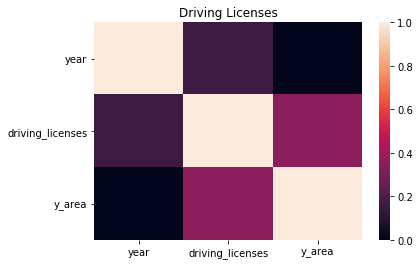

In [1220]:
sns.heatmap(driving_licenses.corr())
plt.title('Driving Licenses')
plt.show()

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [1224]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title
        ax[i].set_xlabel
        sns.distplot(dataframe[column], bins=20, kde=False, ax=ax[i], color = 'blue')

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

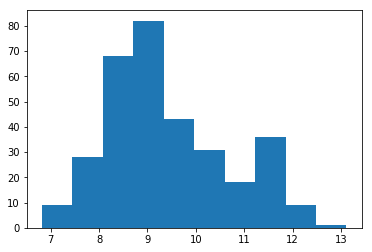

In [1227]:
# Code
plt.hist(np.log1p(driving_licenses_no_total['driving_licenses']))
plt.show()

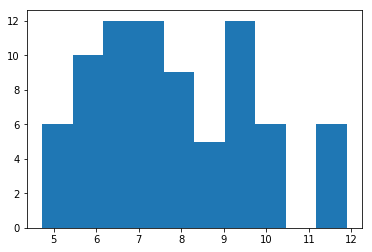

In [1228]:
plt.hist(np.log1p(traffic_accidents4_no_total['no_accidents']))
plt.show()

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


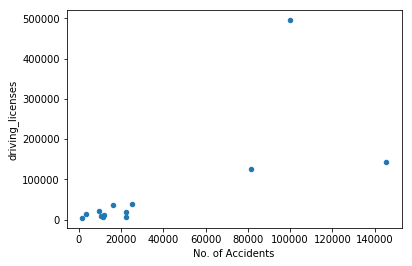

In [933]:
# Code
combined_datasets_2017=combined_datasets[combined_datasets['year']==2017]
combined_datasets_2017.plot.scatter(x='No. of Accidents',y='driving_licenses')
plt.show()


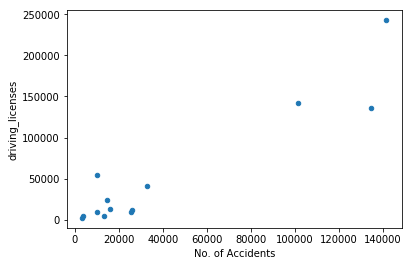

In [850]:
combined_datasets_2016=combined_datasets[combined_datasets['year']==2016]
combined_datasets_2016.plot.scatter(x='No. of Accidents',y='driving_licenses')
plt.show()

In [1234]:
driving_licenses_no_total_2017=driving_licenses_no_total[driving_licenses_no_total['year']==2017]

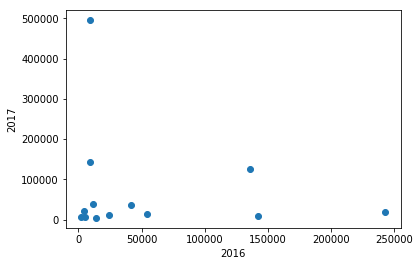

In [1242]:
plt.scatter(driving_licenses_no_total_2016['driving_licenses'], driving_licenses_no_total_2017['driving_licenses'])
plt.xlabel('2016')
plt.ylabel('2017')
plt.show()

In [1244]:
traffic_accidents4_no_total_2017=traffic_accidents4_no_total[traffic_accidents4_no_total['year']==2017]
traffic_accidents4_no_total_2016=traffic_accidents4_no_total[traffic_accidents4_no_total['year']==2016]

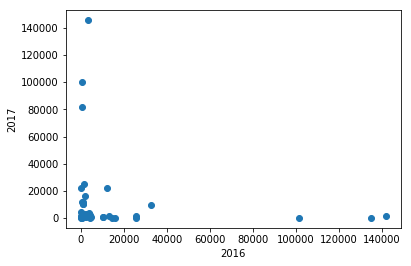

In [1246]:
plt.scatter(traffic_accidents4_no_total_2016['no_accidents'], traffic_accidents4_no_total_2017['no_accidents'],)
plt.xlabel('2016')
plt.ylabel('2017')
plt.show()

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

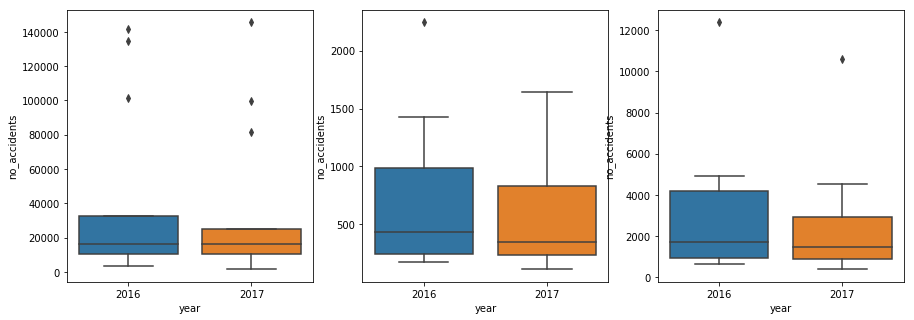

In [1503]:
# Code casualties_types no_accidents
#traffic_accidents4_no_total_2016.boxplot(column='no_accidents', by='casualties_types')
#combined_datasets
#a=traffic_accidents4_no_total[traffic_accidents4_no_total['casualties_types']== 'No. of Accidents']
#b=traffic_accidents4_no_total[traffic_accidents4_no_total['casualties_types']== 'No. of Casualties - Dead']
#c=traffic_accidents4_no_total[traffic_accidents4_no_total['casualties_types']== 'No. of Casualties - Injured']
f, axes = plt.subplots(1, 3, figsize=(15,5))
sns.boxplot(x='year',y='no_accidents',data=a, ax=axes[0])

sns.boxplot(x='year',y='no_accidents',data=b, ax=axes[1])

sns.boxplot(x='year',y='no_accidents',data=c, ax=axes[2])
plt.show()

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

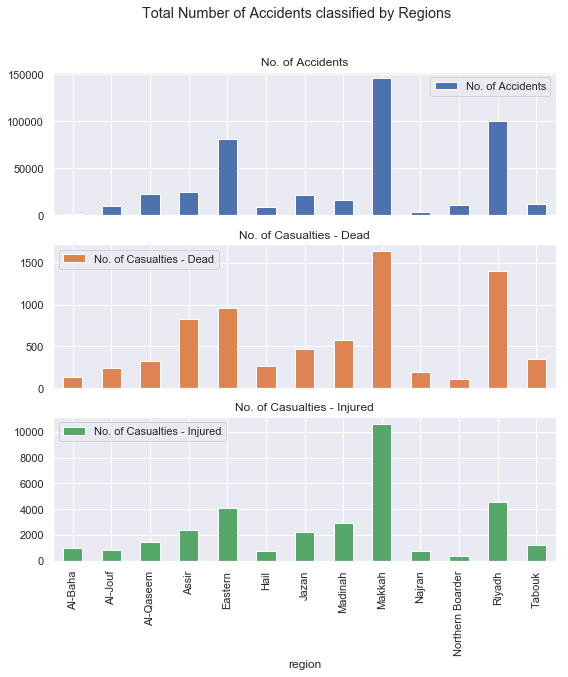

In [1542]:
k[['No. of Accidents','No. of Casualties - Dead','No. of Casualties - Injured']].plot(kind='bar',subplots=True,\
                                                                                      figsize=(9,9),legend=True,title=('Total Number of Accidents Classified by Regions'))
plt.show()



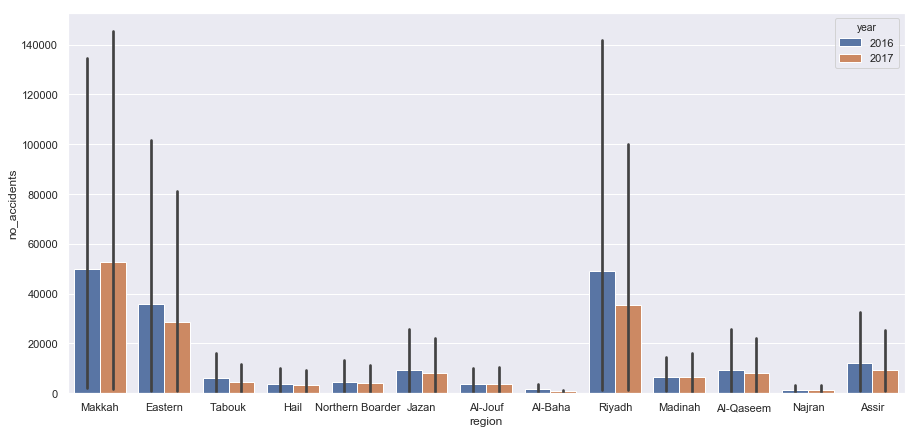

In [1547]:
# #k=combined_datasets.set_index('region')
# k[['No. of Accidents','No. of Casualties - Dead','No. of Casualties - Injured']].plot(kind='bar',subplots=True,\
#                                                                                        figsize=(9,9),legend=True)
# plt.show()
#k=k.set_index('region')
#k=k[k.year== 2017]
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(x='region',y='no_accidents',data=traffic_accidents4_no_total, hue='year',).set_title('Total Number of Accidents by Region During (2016 - 2017)')

plt.show()

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

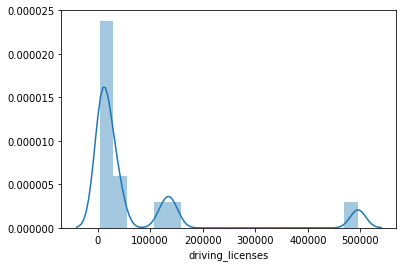

In [1363]:
#Answers:
sns.distplot(t['driving_licenses'])


In [1362]:
#driving_licenses_no_total.sort_values(by='driving_licenses')
t=driving_licenses_no_total[driving_licenses_no_total['year']==2017]

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [1513]:
# Code
sns.barplot()

,year,region,casualties_types,no_accidents,x_area,y_area
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696


## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:








## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

Answer: